# Exercises

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import urllib

## Q4: Climate

Download the data file of global surface air temperature averages from here:
https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt
This data comes from: https://data.giss.nasa.gov/gistemp/graphs/

(Don't ask, of course you can download data straight from python! The library is called `urllib`)

There are 3 columns here: the year, the temperature change, and a smoothed representation of the temperature change.  

  * Read in this data using `np.loadtxt()`.  
  * Plot as a line the smoothed representation of the temperature changes.  
  * Plot as points the temperature change (no smoothing).  Color the points blue if they are < 0 and color them red if they are >= 0
  
You might find the numpy `where()` function useful.

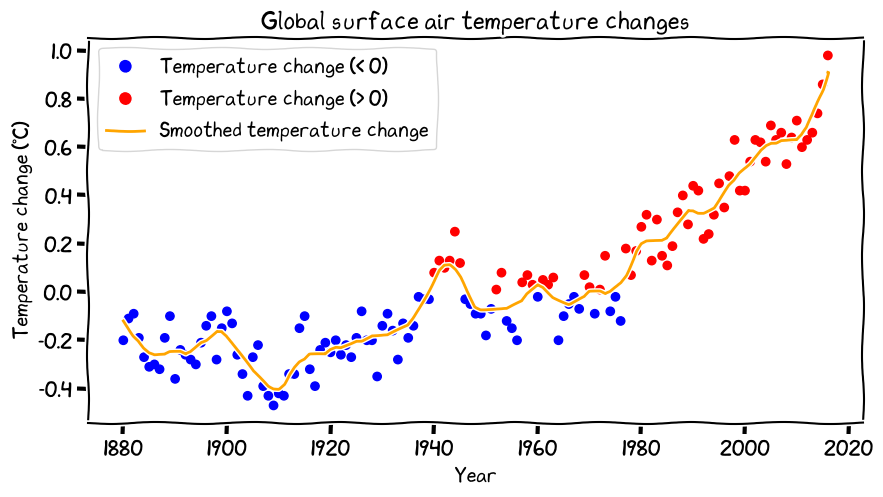

In [2]:
url = "https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt"
filename = "misc/nasa-giss.txt"

if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)

data = np.loadtxt(filename)

years = data[:, 0]
temperatures = data[:, 1]
temperatures_smoothed = data[:, 2]

plt.xkcd()
plt.figure(figsize=(10, 5))
plt.plot(
    years, temperatures_smoothed, label="Smoothed temperature change", color="orange"
)

colors = np.where(temperatures < 0, "blue", "red")
plt.scatter(years, temperatures, color=colors)

# Artifact
blue_dot = plt.Line2D(
    [0],
    [0],
    marker="o",
    color="w",
    markerfacecolor="blue",
    markersize=10,
    label="Temperature change (< 0)",
)
red_dot = plt.Line2D(
    [0],
    [0],
    marker="o",
    color="w",
    markerfacecolor="red",
    markersize=10,
    label="Temperature change (> 0)",
)

plt.xlabel("Year")
plt.ylabel("Temperature change (°C)")
plt.title("Global surface air temperature changes")
plt.legend(
    handles=[
        blue_dot,
        red_dot,
        plt.Line2D([0], [0], color="orange", label="Smoothed temperature change"),
    ]
)
plt.show()

## Q5: Subplots

matplotlib has a number of ways to create multiple axes in a figure -- look at `plt.subplots()` (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)

Create an `x` array using NumPy with a number of points, spanning from $[0, 2\pi]$.  

Create 3 axes vertically, and do the following:

* Define a new numpy array `f` initialized to a function of your choice.
* Plot f in the top axes
* Compute a numerical derivative of `f`,
   $$ f' = \frac{f_{i+1} - f_i}{\Delta x}$$
  and plot this in the middle axes
* Do this again, this time on $f'$ to compute the second derivative and plot that in the bottom axes


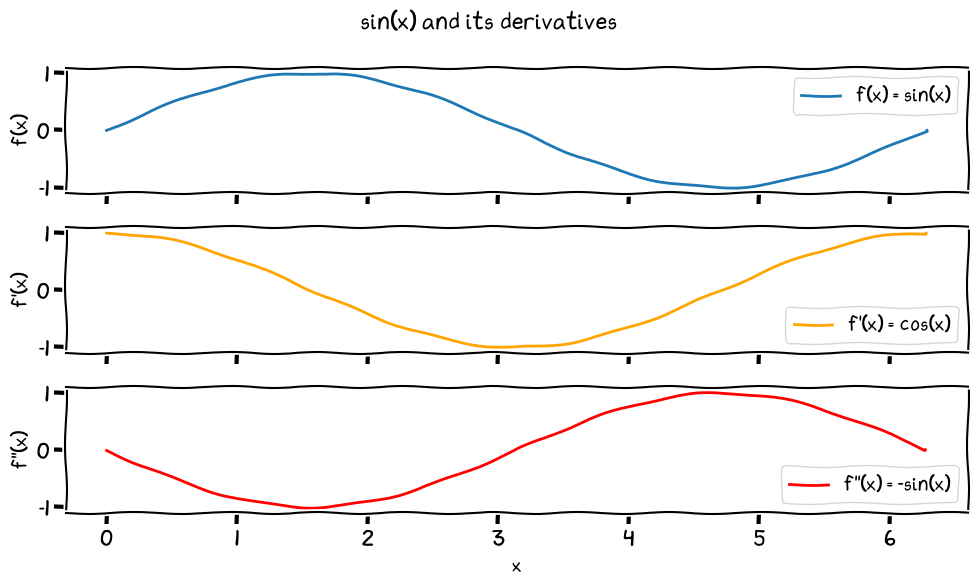

In [3]:
x = np.linspace(0, 2 * np.pi, 1000)
dx = x[1] - x[0]


f = np.sin(x)
f_prime = (f[1:] - f[:-1]) / dx
f_double_prime = (f_prime[1:] - f_prime[:-1]) / dx


fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
fig.suptitle("sin(x) and its derivatives")

axs[0].plot(x, f, label='f(x) = sin(x)')
axs[0].set_ylabel('f(x)')
axs[0].legend(loc=1)

axs[1].plot(x[:-1], f_prime, label="f'(x) = cos(x)", color='orange')
axs[1].set_ylabel("f'(x)")
axs[1].legend(loc=4)

axs[2].plot(x[:-2], f_double_prime, label="f''(x) = -sin(x)", color='red')
axs[2].set_xlabel('x')
axs[2].set_ylabel("f''(x)")
axs[2].legend(loc=4)

plt.tight_layout()
plt.show()